<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Programming for Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 5</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td> 22127008 </td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td> 22127170 </td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">COVID - 19 ANALYSIS - DATA ANALYSIS</div>
</div>

# **Table of Contents**

1. [**Import necessary packages**](#import)

2. [**Load data**](#load)

3. [**Preprocessing**](#preprocessing)

4. [**Analysis**](#analysis)
    - [Question 1](#q1)
    - [Question 2](#q2)
    - [Question 3](#q3)
    - [Question 4](#q4)
    - [Question 5](#q5)
    - [Question 6](#q6)

# **Data Analysis**
<a id="import"></a>
## **Import necessary packages**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="load"></a>
## **Load data**
Read cleaned data from last section
- Read the data from the file `covid_19.csv` and display the 5 rows of the data.

In [39]:
# covid_19.csv
covid_19_df = pd.read_csv("./cleaned_data/covid_19.csv")
covid_19_df.sample(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
29289,China,39.549000,116.130600,2020-05-13,328,6,0,322,Western Pacific
38718,Denmark,61.892600,-6.911800,2020-06-18,187,0,187,0,Europe
17907,Mongolia,46.862500,103.846700,2020-03-30,12,0,2,10,Western Pacific
29108,Japan,36.204824,138.252924,2020-05-12,15948,707,8531,6710,Western Pacific
41059,Congo (Brazzaville),-0.228000,15.827700,2020-06-27,1087,37,456,594,Africa


Read cleaned data from last section
- Read the data from the file `lastest.csv` and display the 5 rows of the data.

In [40]:
# lastest.csv
world_df = pd.read_csv("./cleaned_data/latest.csv")
world_df.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
196,Saint Lucia,North America,183712.0,25,0.0,24.0,1.0,0.0,136.0,0.0,3895.0,21202.0,Americas
141,Georgia,Asia,3988368.0,1206,17.0,987.0,202.0,0.0,302.0,4.0,240473.0,60294.0,Europe
181,Brunei,Asia,437893.0,141,3.0,138.0,0.0,0.0,322.0,7.0,41148.0,93968.0,No-WHO Region
6,Peru,South America,33016319.0,455409,20424.0,310337.0,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
151,Sao Tome and Principe,Africa,219544.0,878,15.0,797.0,66.0,0.0,3999.0,68.0,3079.0,14025.0,Africa


<a id="preprocessing"></a>
## **Preprocessing**

### **What are total number of Confirmed, Deaths, Recovered and Active cases around the world?** 
- Answer this question indicating the total number of confirmed, deaths, recovered and active cases around the world.
- Answer this question by finding out the total number of confirmed, deaths, recovered and active cases of all countries in `worldometer_data` and plot them using bar chart.

In [41]:
total_confirmed = world_df['TotalCases'].sum()
total_deaths = world_df['TotalDeaths'].sum()
total_recovered = world_df['TotalRecovered'].sum()
total_active = world_df['ActiveCases'].sum()

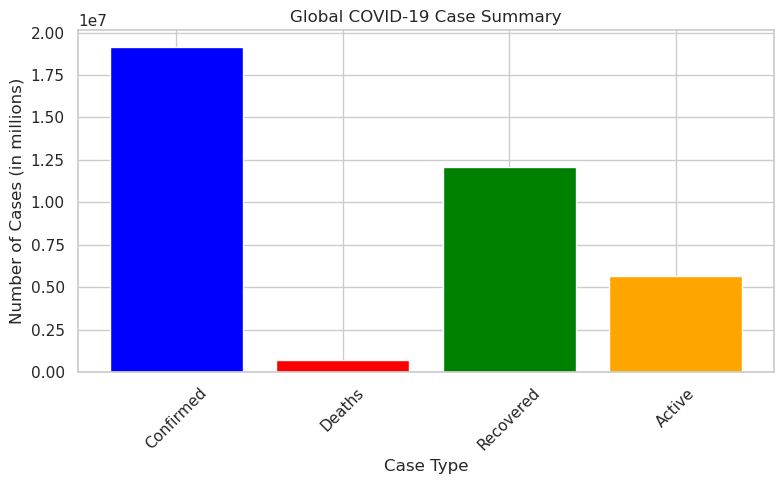

{'Confirmed': np.int64(19169166),
 'Deaths': np.float64(713007.0),
 'Recovered': np.float64(12070191.0),
 'Active': np.float64(5671187.0)}

In [42]:
totals = {
    "Confirmed": total_confirmed,
    "Deaths": total_deaths,
    "Recovered": total_recovered,
    "Active": total_active
}

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(totals.keys(), totals.values(), color=['blue', 'red', 'green', 'orange'])
plt.title("Global COVID-19 Case Summary")
plt.ylabel("Number of Cases (in millions)")
plt.xlabel("Case Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

totals

### **The correlation between population, death cases, recovered case, active case and critical, serious case. Give insights into the relationship between the number of cases and deaths with the population of the country.** 
- By answering this question, it helps us to understand the relationship between the population and total death cases, total recovered cases, total actived cases and critial, serious case. This information is useful for the to gain insigns about any feature affect the number of cases in that country.
- Answer this question by calculating the correlation matrix between population, cases and deaths. Then, we will plot the correlation matrix using a heatmap.

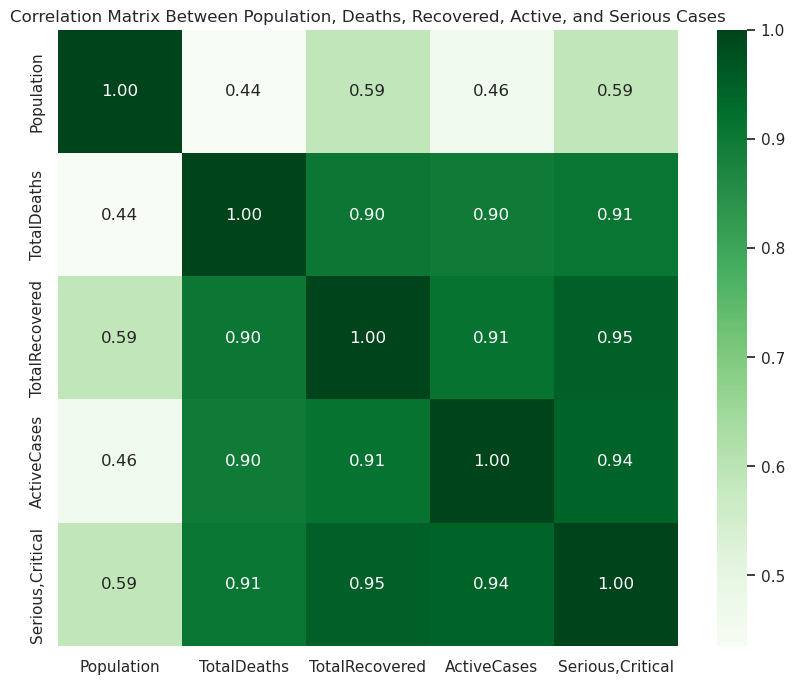

,Population,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical"
Population,1.000000,0.435269,0.589550,0.458732,0.588562
TotalDeaths,0.435269,1.000000,0.903282,0.897461,0.909095
TotalRecovered,0.589550,0.903282,1.000000,0.914581,0.949477
ActiveCases,0.458732,0.897461,0.914581,1.000000,0.944925
"Serious,Critical",0.588562,0.909095,0.949477,0.944925,1.000000


In [43]:
# Select the relevant columns for correlation
used_col = ['Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical']
correlation_data = world_df[used_col]
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Matrix Between Population, Deaths, Recovered, Active, and Serious Cases")
plt.show()

correlation_matrix


### **What are the top 10 countries with the lowest number of deaths/recovered/actived cases?** 
- Answer this question provides the top 10 countries with the lowest number of case (death, recoverd, active) and by these results, we can see the countries that have the best control of the pandemic and gain some insights into find the least affected regions.
- To answer this question, we will use `worldometer_data` and sort the values in ascending order. Then, we will display the top 10 countries with the lowest number of deaths, recovered, and active cases.



### **What are the top 10 countries with the highest number of deaths/recovered/actived cases?** 
- Answer this question provides the top 10 countries with the highest number of cases (death, recoverd, active) and by these results, we can see the countries that have the best control of the pandemic and gain some insights into find the most affected regions.
- To answer this question, we will use `worldometer_data` and sort the values in descending order. Then, we will display the top 10 countries with the highest number of deaths, recovered, and active cases.


<a id="analysis"></a>
## **Analysis**
<a id="q1"></a>

<a id="q2"></a>
### **Question 1.** Does the global trend over time for Confirmed/Deaths/Recovered cases evolve over time?
- Answer this question indicates the trend of the number of confirmed, deaths, and recovered cases over time: when it peaks, when it decreases, and when it increases in the time series.
- To answer this question, we will group `clean_complete_data` by `Date` and sum the values of `Confirmed`, `Deaths`, and `Recovered` columns. Then, we will plot the global trend over time for confirmed, deaths, and recovered cases using line charts.

In [44]:
# Find total confirmed/deaths/recovered/acive cases per day
total_per_day = covid_19_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
total_per_day.to_csv(r"cleaned_data/total_per_day.csv", index=False)
total_per_day.sample(5)

,Date,Confirmed,Deaths,Recovered,Active
70,2020-04-01,947569,50029,189434,708106
26,2020-02-17,72815,1868,11951,58996
165,2020-07-05,11454847,534150,6105546,4815151
169,2020-07-09,12273063,554831,6665237,5052995
64,2020-03-26,538666,24800,119804,394062


<a id="q6"></a>
### **Question 2.** How the world respond to the COVID-19 pandemic?
- Answer this question indicates the response of the wolrd separated by continents to the COVID-19 pandemic in different aspects: how pandemic hit these countries, effectiveness of epidemic control by testing and the recovery rate.
- To answer this question, first, we will extract and summarize the relevant data for each continent in the world. To analyze how the pandemic hit them, we will plot the rate of "Death", "Serious,Critical" and "Recovered" cases by 1M population in these continents. To analyze the effectiveness of epidemic control by testing, we will plot the rate of "Tests/1M pop" in these continents.

First, we will check the continents status of the COVID-19 pandemic by plotting the rate of "Death", "Serious,Critical" and "Recovered" cases by 1M population in these continents.

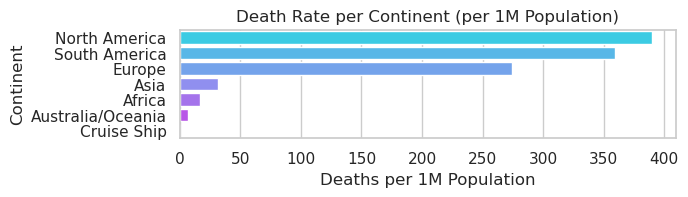

,Continent,TotalDeaths,Population,Deaths_per_1M
0,North America,229855.0,5.895035e+08,389.912889
1,South America,154885.0,4.311105e+08,359.269869
2,Europe,205232.0,7.476775e+08,274.492662
3,Asia,100627.0,3.173656e+09,31.706961
4,Africa,22114.0,1.343515e+09,16.459803
5,Australia/Oceania,281.0,4.095791e+07,6.860702
6,Cruise Ship,13.0,0.000000e+00,0.000000


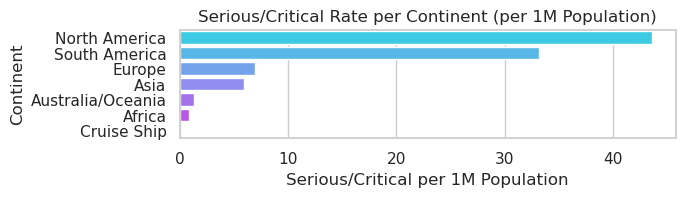

,Continent,"Serious,Critical",Population,Serious_per_1M
0,North America,25709.0,5.895035e+08,43.611279
1,South America,14295.0,4.311105e+08,33.158555
2,Europe,5200.0,7.476775e+08,6.954870
3,Asia,18749.0,3.173656e+09,5.907697
4,Australia/Oceania,52.0,4.095791e+07,1.269596
5,Africa,1187.0,1.343515e+09,0.883503
6,Cruise Ship,4.0,0.000000e+00,0.000000


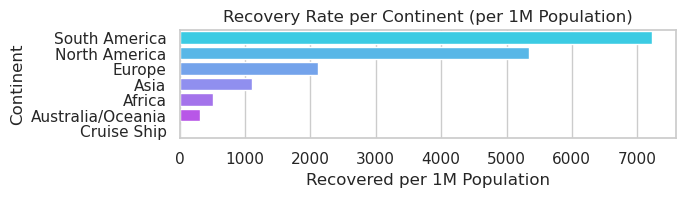

,Continent,TotalRecovered,Population,Recovered_per_1M
0,South America,3116150.0,4.311105e+08,7228.193839
1,North America,3151678.0,5.895035e+08,5346.326487
2,Europe,1587302.0,7.476775e+08,2122.976688
3,Asia,3508170.0,3.173656e+09,1105.403214
4,Africa,693620.0,1.343515e+09,516.272425
5,Australia/Oceania,12620.0,4.095791e+07,308.121198
6,Cruise Ship,651.0,0.000000e+00,0.000000


In [53]:
# Group by continent and find sum of population, total deaths, total recovered, serious, critical case
continent_stat = world_df.groupby('Continent')[['Population', 'TotalDeaths', 'Serious,Critical', 'TotalRecovered']].sum().reset_index()

# Calculate death rate and serious/critical rate per 1M population for each continent
continent_stat['Deaths_per_1M'] = continent_stat['TotalDeaths'] / continent_stat['Population'] * 1000000
continent_stat['Serious_per_1M'] = continent_stat['Serious,Critical'] / continent_stat['Population'] * 1000000
continent_stat['Recovered_per_1M'] = continent_stat['TotalRecovered'] / continent_stat['Population'] * 1000000

# Handle the case in `Cruse Ship`
continent_stat.loc[continent_stat['Continent'] == 'Cruise Ship', 'Deaths_per_1M'] = 0
continent_stat.loc[continent_stat['Continent'] == 'Cruise Ship', 'Serious_per_1M'] = 0
continent_stat.loc[continent_stat['Continent'] == 'Cruise Ship', 'Recovered_per_1M'] = 0

# Sort the data by death rate, serious/critical rate and recover rate
continent_stat_deaths = continent_stat.sort_values('Deaths_per_1M', ascending=False).reset_index(drop=True)
continent_stat_serious = continent_stat.sort_values('Serious_per_1M', ascending=False).reset_index(drop=True)
continent_stat_recovered = continent_stat.sort_values('Recovered_per_1M', ascending=False).reset_index(drop=True)

# Plot 1: Death rate per continent (per 1M population)
plt.subplot(3, 1, 1)
sns.barplot(x='Deaths_per_1M', y='Continent', data=continent_stat_deaths, palette='cool', hue='Continent')
plt.title('Death Rate per Continent (per 1M Population)')
plt.xlabel('Deaths per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_stat_deaths[['Continent', 'TotalDeaths', 'Population', 'Deaths_per_1M']])

# Plot 2: Serious/Critical rate per continent (per 1M population)
plt.subplot(3, 1, 2)
sns.barplot(x='Serious_per_1M', y='Continent', data=continent_stat_serious, palette='cool', hue='Continent')
plt.title('Serious/Critical Rate per Continent (per 1M Population)')
plt.xlabel('Serious/Critical per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_stat_serious[['Continent', 'Serious,Critical', 'Population', 'Serious_per_1M']])

# Plot 3: Recovery rate per continent (per 1M population)
plt.subplot(3, 1, 3)
sns.barplot(x='Recovered_per_1M', y='Continent', data=continent_stat_recovered, palette='cool', hue='Continent')
plt.title('Recovery Rate per Continent (per 1M Population)')
plt.xlabel('Recovered per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_stat_recovered[['Continent', 'TotalRecovered', 'Population', 'Recovered_per_1M']])

**Insights:**
- For the rate of "Death" cases by 1M population, North America has the highest Deaths per 1M population at 389.91, followed closely by South America at 359.27. In contrast, Asia shows significantly lower mortality rates at 31.71. This disparity highlights regional differences in healthcare capacity and response effectiveness during the pandemic.
- For the rate of "Serious,Critical" cases by 1M population, North America also reports the highest total of Serious/Critical cases at 25,709, followed by South America with 14,295. However, the relatively low serious cases in Asia (18,749) compared to its large population suggests that many infections were asymptomatic or mild, possibly due to effective early interventions.
- For the rate of "Recovered" cases by 1M population, South America and North America both report high recovery totals, with TotalRecovered figures of 3,116,150 and 3,151,678 respectively, indicating that despite high case numbers, many individuals successfully recovered from the virus across these regions. Asia also has a high recovery rate with 3,508,170, showing effective management of cases.

Testing for COVID-19 is crucial in controlling the pandemic as it helps identify and isolate infected individuals, thereby preventing further transmission. By detecting cases early, health authorities can implement targeted interventions and manage outbreaks more effectively. A high testing rate reflects a country’s commitment to monitoring the virus's spread, enabling timely data collection to inform public health strategies. Ultimately, increased testing is an active measure that empowers governments and communities to make informed decisions, assess the effectiveness of control measures, and adapt their responses based on real-time information about the pandemic's status.

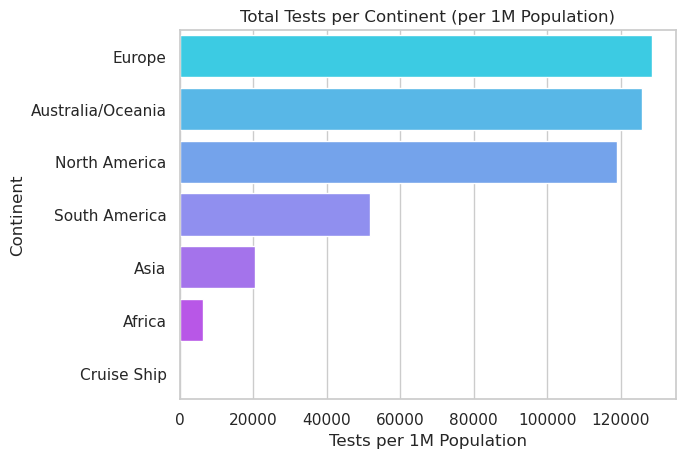

,Continent,TotalTests,Population,Tests/1M pop
0,Europe,96125611.0,7.476775e+08,128565.598251
1,Australia/Oceania,5152811.0,4.095791e+07,125807.472252
2,North America,70173584.0,5.895035e+08,119038.458513
3,South America,22379618.0,4.311105e+08,51911.562972
4,Asia,65353821.0,3.173656e+09,20592.594930
5,Africa,8673853.0,1.343515e+09,6456.087087
6,Cruise Ship,0.0,0.000000e+00,NaN


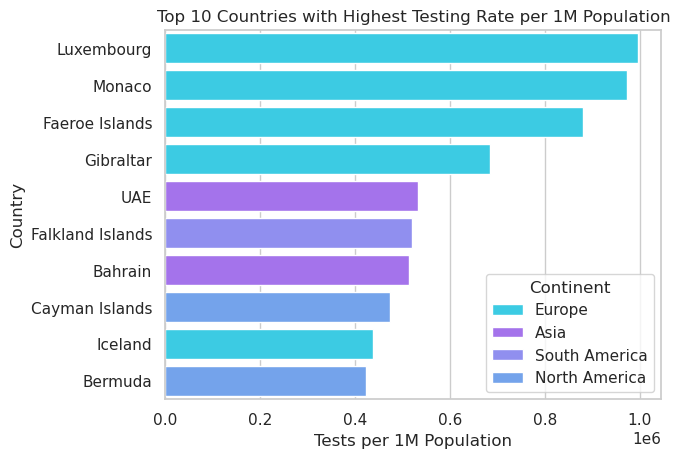

,Country/Region,Continent,Population,TotalTests,Tests/1M pop
0,Luxembourg,Europe,626952.0,623994.0,995282.0
1,Monaco,Europe,39270.0,38209.0,972982.0
2,Faeroe Islands,Europe,48882.0,43045.0,880590.0
3,Gibraltar,Europe,33690.0,23063.0,684565.0
4,UAE,Asia,9902079.0,5262658.0,531470.0
5,Falkland Islands,South America,3489.0,1816.0,520493.0
6,Bahrain,Asia,1706669.0,876700.0,513691.0
7,Cayman Islands,North America,65798.0,31108.0,472780.0
8,Iceland,Europe,341465.0,149693.0,438385.0
9,Bermuda,North America,62254.0,26352.0,423298.0


In [47]:
# Get top 10 countries with the highest testing rate per 1M population
top_10_testing_rate = world_df.nlargest(10, 'Tests/1M pop').reset_index(drop=True)

# Calculate total tests and total population for each continent
continent_summary = world_df.groupby('Continent')[['Population', 'TotalTests']].sum().reset_index()

# Calculate testing rate per 1M population for each continent
continent_summary['Tests/1M pop'] = continent_summary['TotalTests'] / continent_summary['Population'] * 1000000

# Sort the data by testing rate
continent_summary = continent_summary.sort_values('Tests/1M pop', ascending=False).reset_index(drop=True)

# Define a fixed palette for continents
palette = sns.color_palette("cool", len(continent_summary['Continent'].unique()))
continent_palette = dict(zip(continent_summary['Continent'].unique(), palette))

# Plot 1: Top 10 countries with the highest testing rate per 1M population
sns.barplot(x='Tests/1M pop', y='Continent', data=continent_summary, palette=continent_palette, hue='Continent')
plt.title('Total Tests per Continent (per 1M Population)')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_summary[['Continent', 'TotalTests', 'Population', 'Tests/1M pop']])

# Plot 2: Total tests per continent (per 1M population)
sns.barplot(x='Tests/1M pop', y='Country/Region', hue='Continent', data=top_10_testing_rate, palette=continent_palette)
plt.title('Top 10 Countries with Highest Testing Rate per 1M Population')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Country')
plt.show()
display(top_10_testing_rate[['Country/Region', 'Continent', 'Population', 'TotalTests', 'Tests/1M pop']])

**Insights:**   
- The rate of "Total Tests" per 1M population in the continents is quite low, which means that the testing capacity in these continents is not enough to control the pandemic effectively. The maximum testing rate across continents is around 120,000 tests per 1M population, suggesting that many regions still struggle with sufficient testing infrastructure.
- The rate of `Tests/1M pop` in each country in the continents is uneven reveals significant disparities in testing capacity. Some countries have implemented extensive testing policies, while others lag far behind, reflecting varied national strategies in response to the pandemic.
- The highest testing rate is in Europe, followed by Australia/Oceania, North America, South America, Asia, and Africa. 
- There is an supprising view that despite being the first region to report COVID-19 cases, Asia has lower overall testing rates than regions like Europe and North America. This could indicate successful early measures taken by some Asian countries, allowing them to manage infections without extensive testing early on.

The COVID-19 pandemic has revealed critical global disparities in mortality rates, recovery rates, and testing capacities. The most hit regions by the spread of the virus is Europe, where has the highest total cases and testing rates. But fortunately, the recovery rate in Europe is also high, just after Asia, this leads to the low mortality rate in this region compared to North America and South America, which have very high serious cases and death rates. While North America and South America face higher mortality rates amidst their serious cases, Asia's ability to achieve high recovery rates with lower mortality rates highlights effective public health responses in some regions. However, the overall low testing rates across continents limit the ability to control the virus effectively, emphasizing the need for improved healthcare infrastructure and testing strategies globally. The mixed experiences underscore the importance of timely interventions, strong healthcare systems, and comprehensive testing in managing a pandemic effectively. 

<a id="q6"></a>
### **Question 3.** Status recorded cases of COVID - 19 with the world of countries during the period